<h2>Exploratory Data Analysis on Diabetes Dataset</h2>

In [107]:
# Import Libraries
import pandas as pd # Analysis Library
import numpy as np # numerical operations library
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library

In [108]:
# Import Dataset
Data = pd.read_csv('diabetes.csv')

In [109]:
# Shape of Dataset
print('No. of Rows:', Data.shape[0])
print('No. of Columns:', Data.shape[1])

No. of Rows: 768
No. of Columns: 9


In [110]:
# Replacing values of column outcome with yes and no; Yes: Diabetic, No: Non Diabetic
Data['Outcome'].replace({0:'No',1:'Yes'},inplace=True)

In [111]:
# Overview of Dataset
Data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,116,74,0,0,25.6,0.201,30,No
6,3,78,50,32,88,31.0,0.248,26,Yes
7,10,115,0,0,0,35.3,0.134,29,No
8,2,197,70,45,543,30.5,0.158,53,Yes
9,8,125,96,0,0,0.0,0.232,54,Yes


In [112]:
cols_rep = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in cols:
  Data[i]=Data[i].replace(to_replace = 0, value =np.NAN)

In [115]:
# Check for null values
Data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [116]:
# Drop NAN Values
Data.dropna(axis=0,inplace=True)

In [118]:
#Check Datatype for each column
Data.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [119]:
#Descriptive statistical information
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000


In [120]:
# No. of values in each category of target variable
Data['Outcome'].value_counts()

No     225
Yes    111
Name: Outcome, dtype: int64

<font size=4><b> Visualization of Data</b> </font>

<font size = 3><b> Swarm Plots </b></font><br>
<font size = 3> Plotting all numerical data with respect to target variable ie Outcome in order to check relationship of numerical variables and categorical variable.</font>

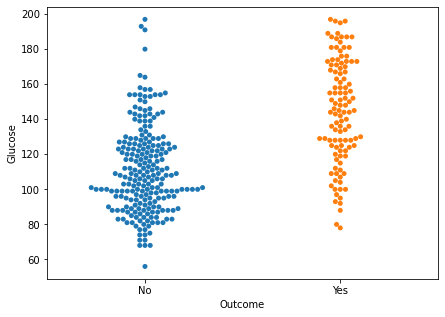

In [121]:
# Plotting swarmplots for each numerical value with respect to target variable
# Glucose
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['Glucose'],hue=None)

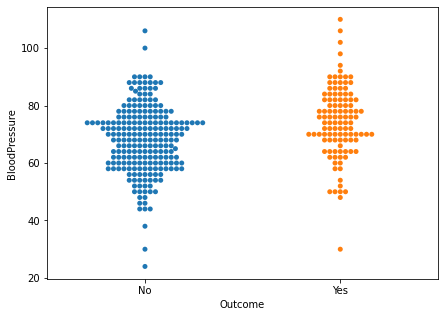

In [122]:
# Blood Pressure
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['BloodPressure'],hue=None)

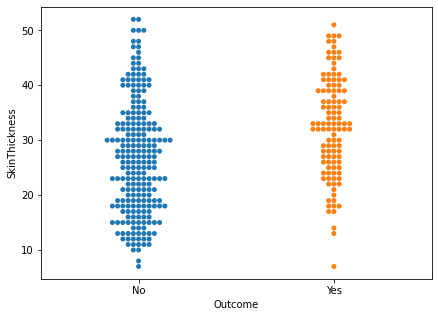

In [123]:
# Skin Thickness
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['SkinThickness'],hue=None)

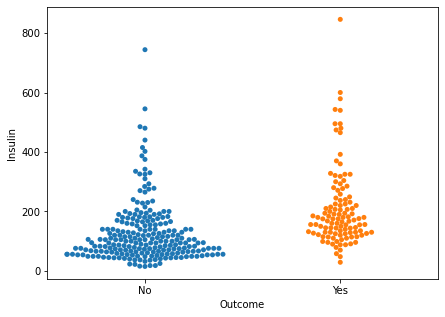

In [124]:
# Insulin
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['Insulin'],hue=None)

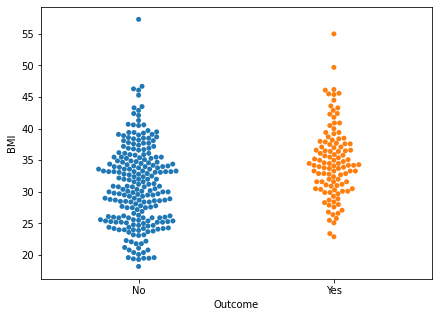

In [125]:
# BMI
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['BMI'],hue=None)

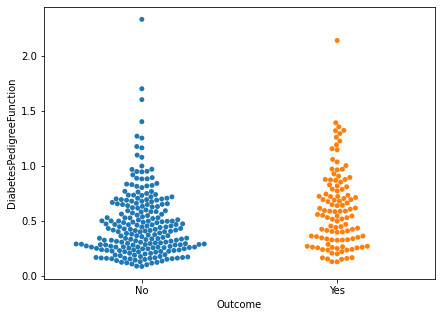

In [126]:
# Diabetes Pedigree Function
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['DiabetesPedigreeFunction'],hue=None)

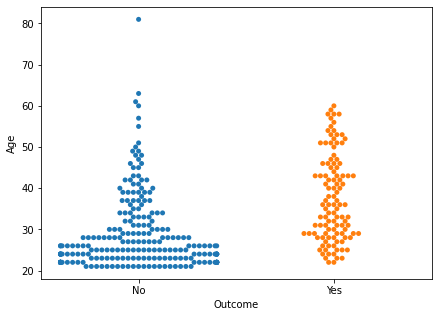

In [127]:
# Age
plt.figure(figsize = (7,5))
sns.swarmplot(Data['Outcome'],Data['Age'],hue=None)

<font size=2><b>After plotting swamplots, it can be oberved that there is least difference in the values of two categories for all numerical variables</b></font>

<font size = 3><b> Pair Plot </b></font><br>
<font size = 3> Plotting distribution of numerical data and scatter plots in order to check relationship of numerical variables</font>

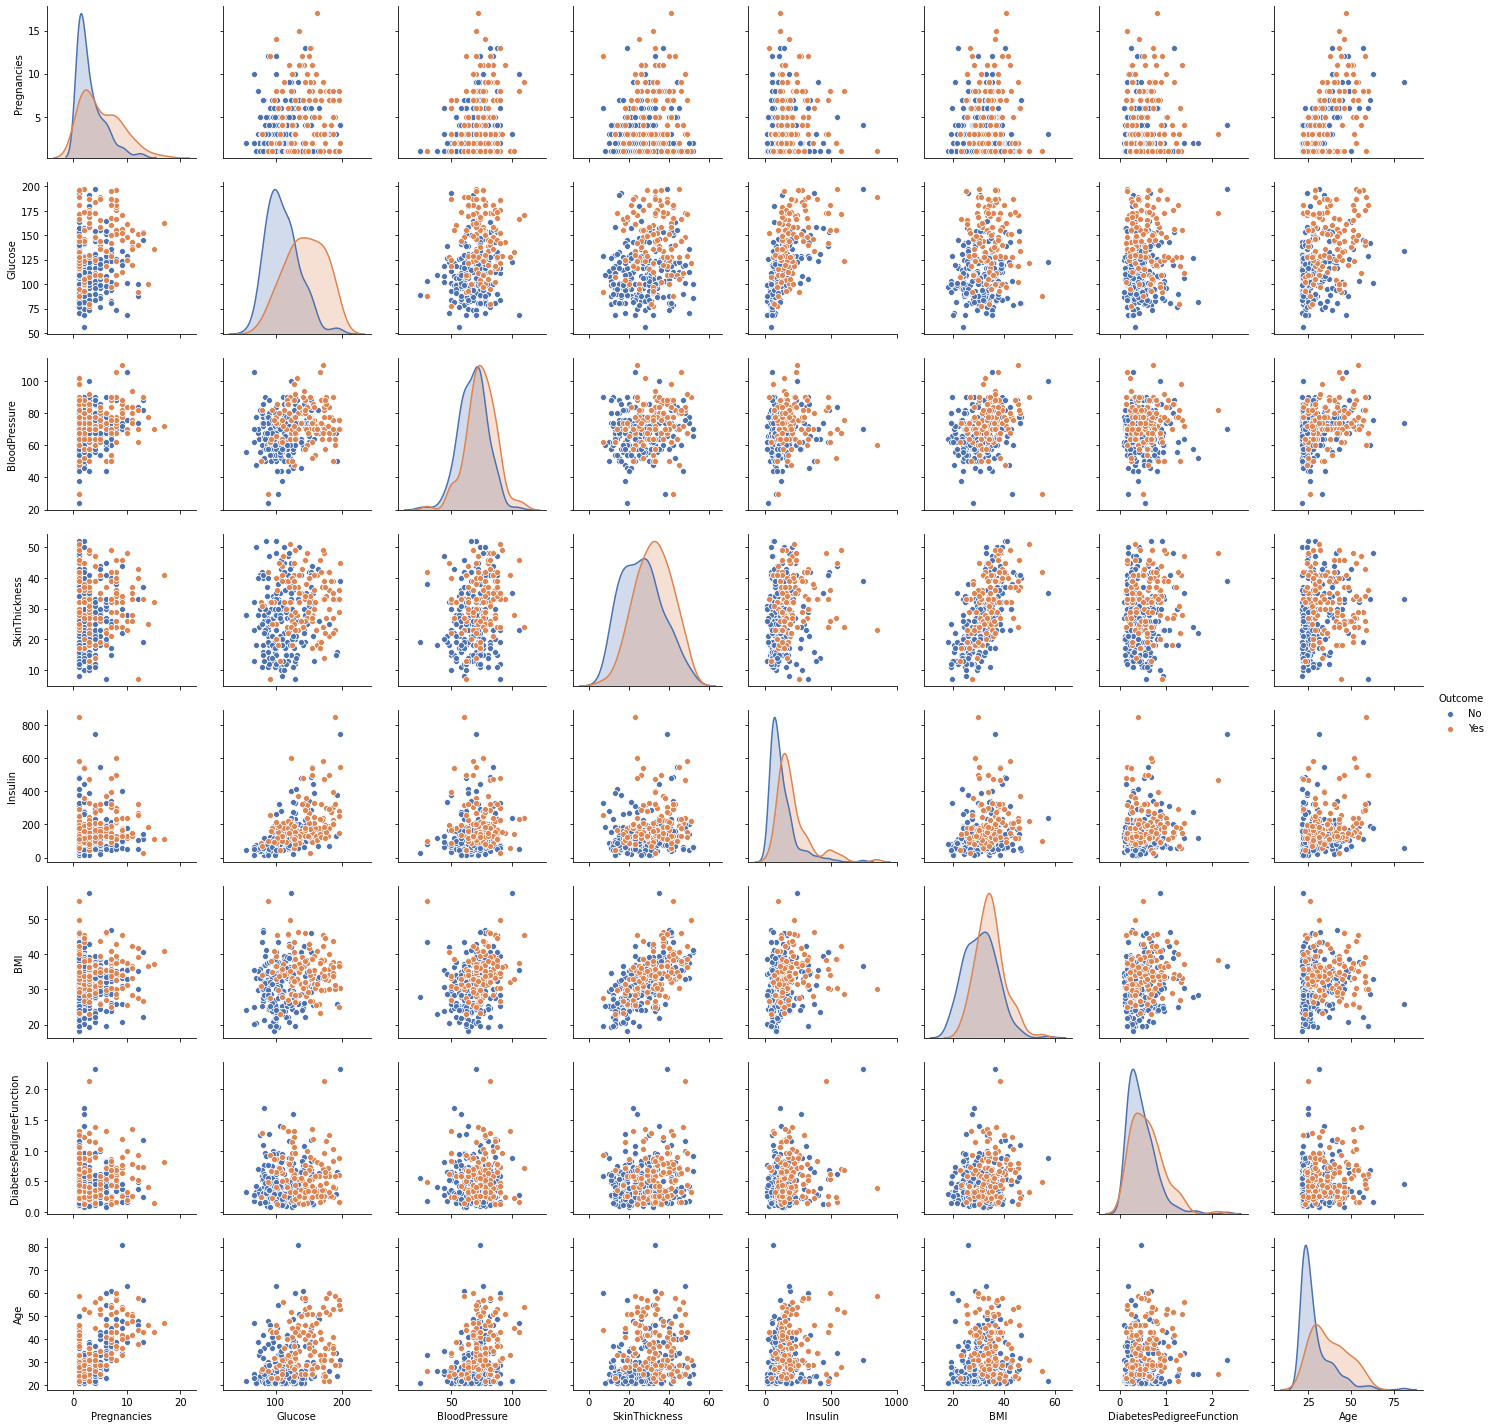

In [128]:
# Name of columns into list
cols = list(Data.columns)

# Pair Plot
sns.pairplot(Data,hue = 'Outcome',diag_kind = "kde",kind = "scatter",palette = "deep")
plt.show()

<font size=2><b>From the above graph, it can be infered that Glucose can somewhat classify, whether person is diabetic or not with respect to other variables.</b></font> 

<font size = 3><b> Correlation Matrix using HeatMap</b></font><br>
<font size = 3> Correlation matrix helps to understand the correlation within numerical data; whether value of one feature increases with respect to other or decreases</font>

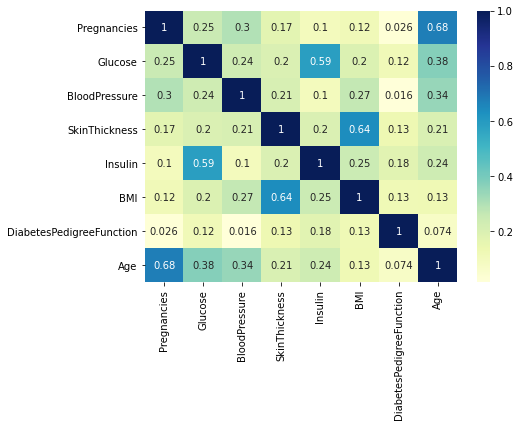

In [129]:
# Heat Map
plt.figure(figsize = (7,5))
sns.heatmap(Data.corr(),annot=True,cmap='YlGnBu')

In [130]:
correlation = Data.corr().abs()
s = correlation.unstack()
so = s.sort_values(kind="quicksort")
print(so[-19:-9])

Pregnancies    BloodPressure    0.298336
Age            BloodPressure    0.343854
BloodPressure  Age              0.343854
Age            Glucose          0.375484
Glucose        Age              0.375484
               Insulin          0.587348
Insulin        Glucose          0.587348
BMI            SkinThickness    0.639901
SkinThickness  BMI              0.639901
Pregnancies    Age              0.675202
dtype: float64


<font size=2><b>The correlation matrix depicts that Pregnancies-Age (0.68), BMI-SkinThickness (0.64) and Insulin-Glucose (0.59) have strong correlations</b></font> 

<font size = 3><b> Box Plot </b></font><br>
<font size = 3> Box plot helps to identify outliers and understand distribution of data</font>

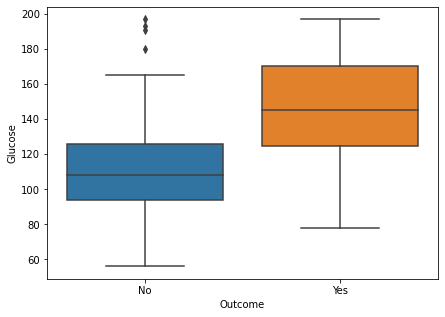

In [133]:
# Glucose
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['Glucose'],hue=None)

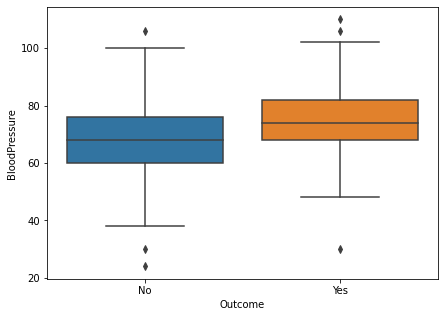

In [134]:
# Blood Pressure
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['BloodPressure'],hue=None)

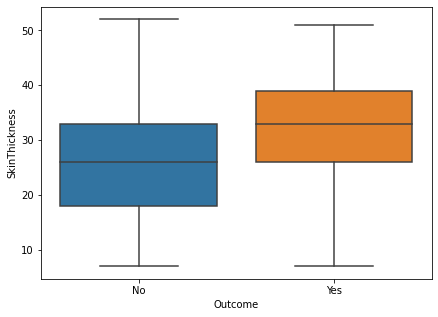

In [135]:
# Skin Thickness
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['SkinThickness'],hue=None)

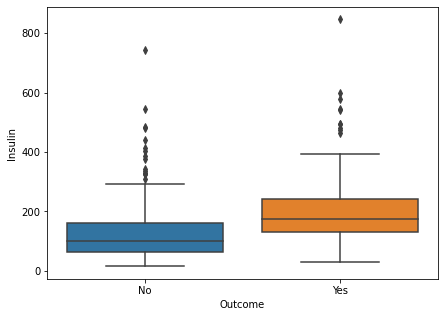

In [137]:
# Insulin
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['Insulin'],hue=None)

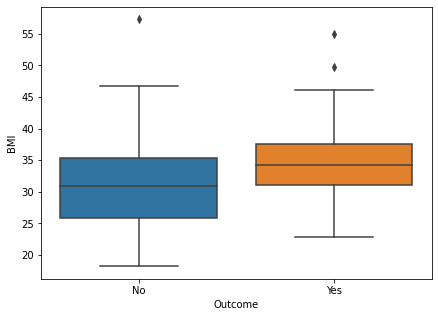

In [138]:
# BMI
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['BMI'],hue=None)

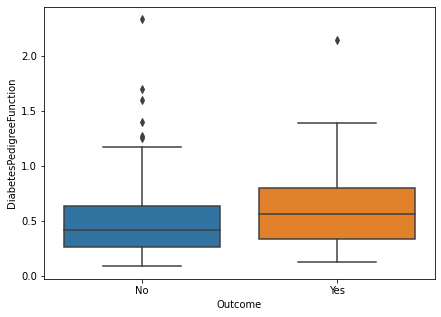

In [140]:
# Diabetes Pedigree Function
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['DiabetesPedigreeFunction'],hue=None)

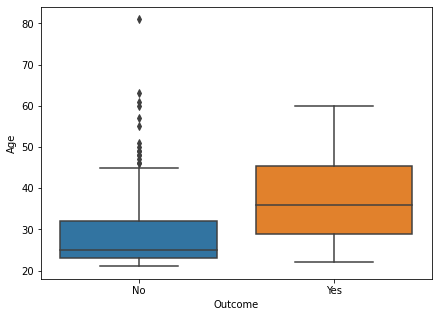

In [141]:
# Age
plt.figure(figsize = (7,5))
sns.boxplot(Data['Outcome'],Data['Age'],hue=None)